Fichier sales_ata.csv créé avec succès!
Informations du dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      100 non-null    datetime64[ns]
 1   product   100 non-null    object        
 2   category  100 non-null    object        
 3   quantity  100 non-null    int64         
 4   price     100 non-null    float64       
 5   region    100 non-null    object        
 6   sales     100 non-null    float64       
 7   month     100 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 6.4+ KB
None


Résumé statistique : 
                      date    quantity        price        sales
count                  100  100.000000   100.000000   100.000000
mean   2023-06-12 12:00:00    1.980000   437.087400   862.275100
min    2023-01-03 00:00:00    1.000000    21.980000    21.980000


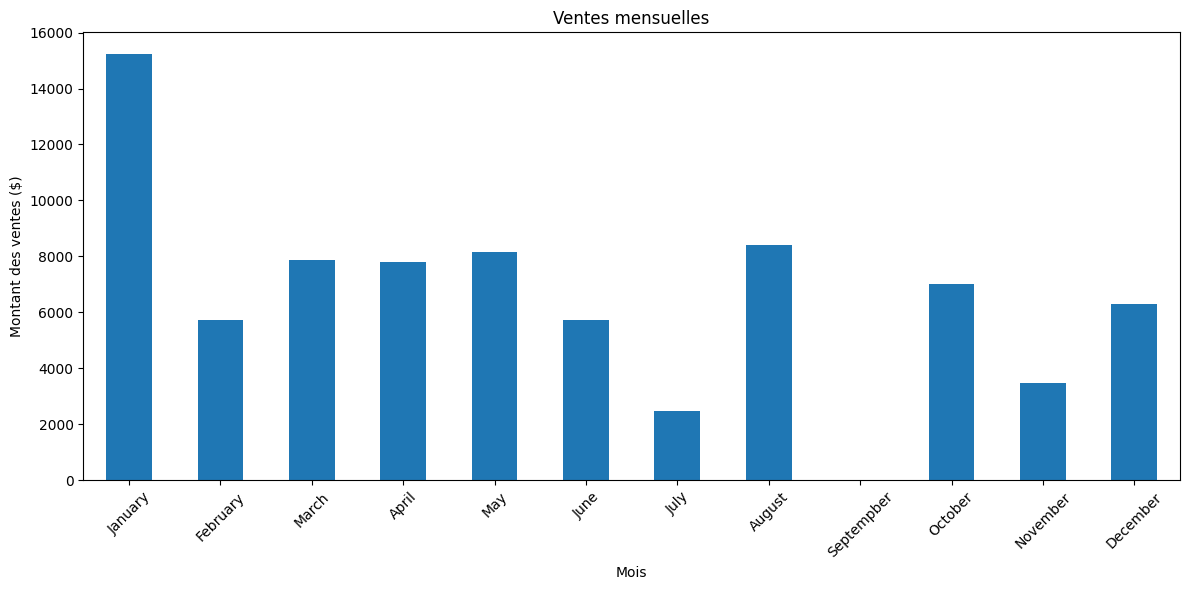

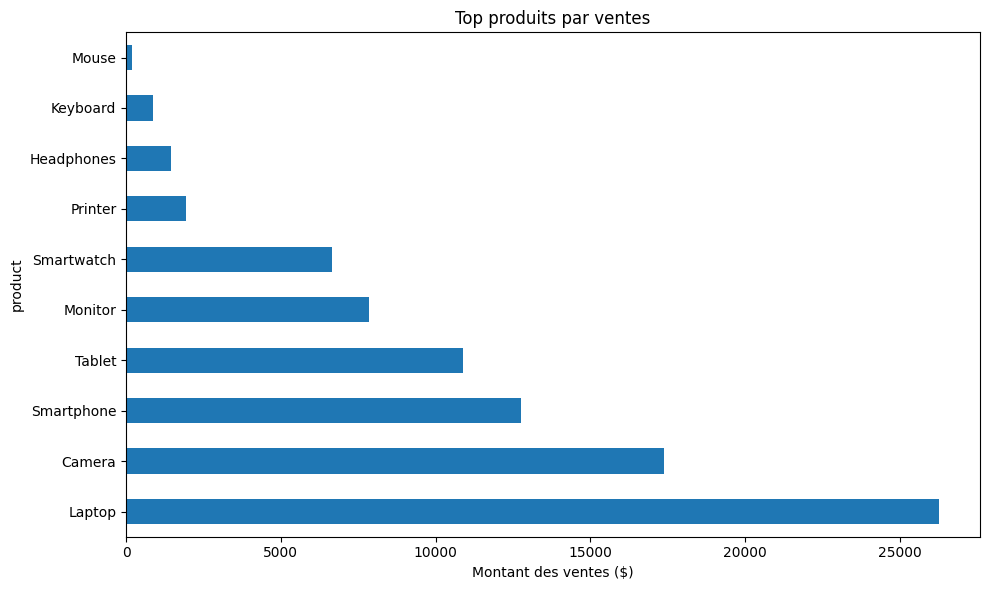

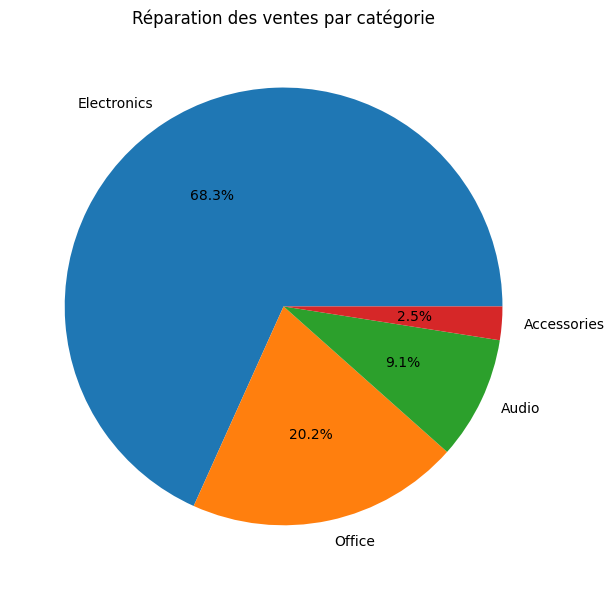

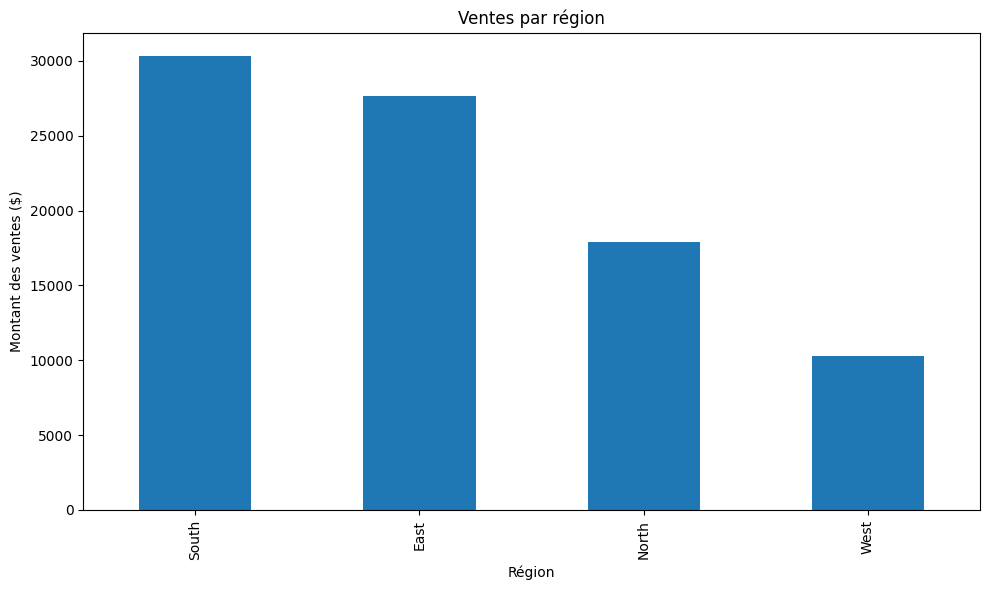

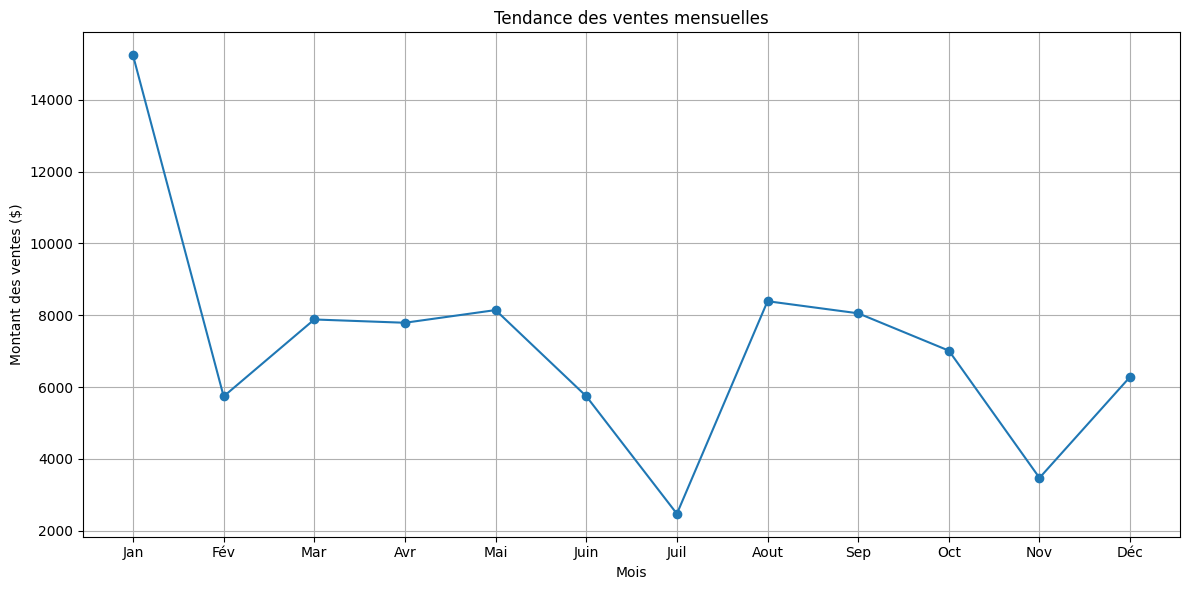

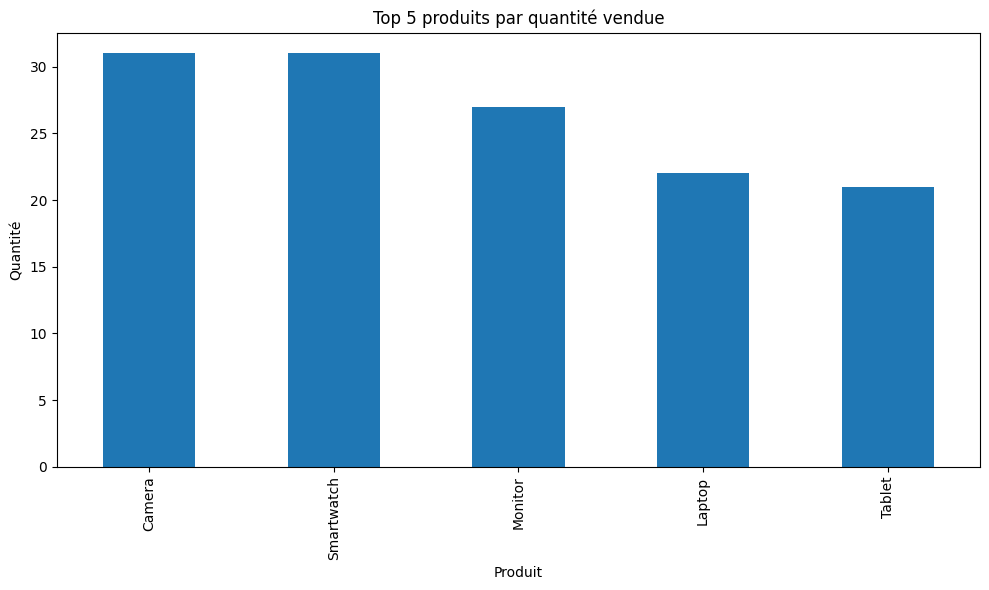

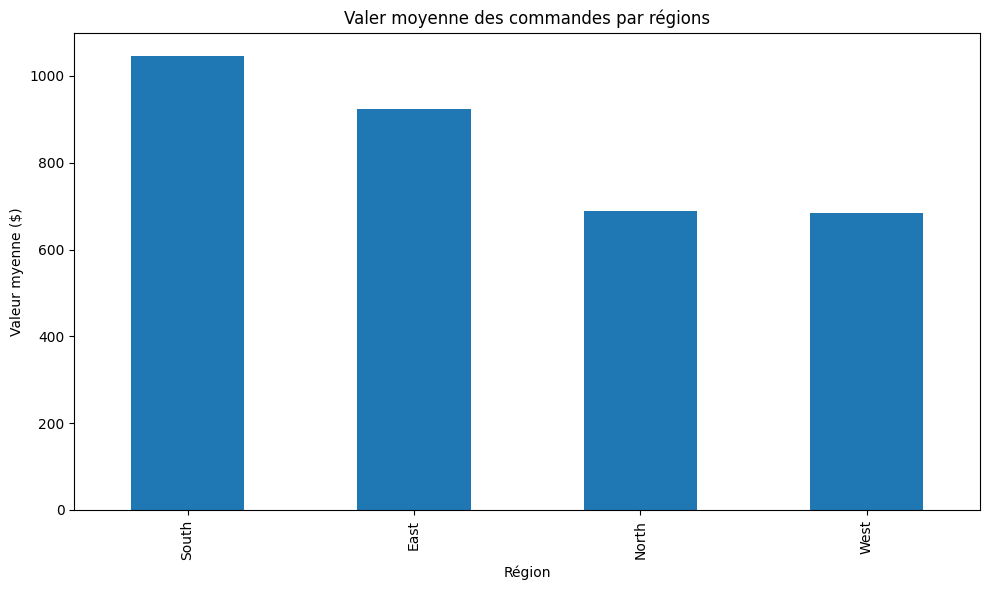


Informations suplémentaires : 
Total des ventes : $86,227.51
valeur moyenne des commandes : $862.28
Produit le plus vendu : Camera
Région la plus performante des revenus : Laptop
Mois le plus rentable : January
Quantité totale vendue : 198 unités

Aperçu des données : 
        date     product     category  quantity    price region    sales  \
0 2023-01-03      Tablet  Electronics         2   424.20   East   848.39   
1 2023-11-25      Tablet  Electronics         2   552.00  North  1104.00   
2 2023-02-02  Headphones  Electronics         2   116.19   West   232.38   
3 2023-02-24       Mouse  Accessories         1    21.98  North    21.98   
4 2023-10-20      Laptop  Electronics         1  1260.01   East  1260.01   
5 2023-04-24  Smartphone  Electronics         1   698.23   East   698.23   
6 2023-01-22      Camera       Office         3   610.98  South  1832.95   
7 2023-10-16  Smartwatch  Electronics         2   233.27  North   466.53   
8 2023-01-06      Tablet  Electronics        

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_sales_data():
    products = ['Laptop', 'Smartphone', 'Tablet', 'Headphones', 'Monitor', 'Keyboard', 'Mouse', 'Printer', 'Camera', 'Smartwatch']

    categories = ['Electronics', 'Electronics', 'Electronics', 'Electronics', 'Audio', 'Electronics', 'Accessories', 'Accessories', 'Office', 'Electronics']

    prices = [1200, 800, 500, 100, 300, 50, 25, 250, 600, 200]

    product_info = {products[i]: {'category': categories[i], 'price': prices[i]} for i in range(len(products))}

    data = []

    for i in range(100):
        product = np.random.choice(products)
        category = product_info[product]['category']
        base_price = product_info[product]['price']

        price = base_price * (1 + np.random.uniform(-0.2, 0.2))
        quantity = np.random.randint(1, 4)
        month = np.random.randint(1, 13)
        day= np.random.randint(1, 29)
        date = f"2023-{month:02d}-{day:02d}"

        region = np.random.choice(['North', 'South', 'East', 'West'])
        sales = quantity * price

        data.append({
            'date': date,
            'product': product,
            'category': category,
            'quantity': quantity,
            'price': round(price, 2),
            'region': region,
            'sales': round(sales, 2)
        })

    df = pd.DataFrame(data)
    df.to_csv('sales_data.csv', index=False)
    print("Fichier sales_ata.csv créé avec succès!")
    return df


df = create_sales_data()
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month_name()

print("Informations du dataset : ")
print("=" * 50)
print(df.info())
print("\n" + "=" * 50)
print("\nRésumé statistique : ")
print("=" * 50)
print(df.describe())
print("\n" + "=" * 50)

print("\nValeurs manquantes : ")
print("="*50)
print(df.isnull().sum())
print("\n" + "=" * 50)

plt.figure(figsize=(12, 6))
monthly_sales = df.groupby('month')['sales'].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'Septempber', 'October', 'November', 'December']

monthly_sales = monthly_sales.reindex(month_order)
monthly_sales.plot(kind='bar')
plt.title('Ventes mensuelles')
plt.xlabel('Mois')
plt.ylabel('Montant des ventes ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
top_products = df.groupby('product')['sales'].sum().sort_values(ascending=False)
top_products.plot(kind='barh')
plt.title('Top produits par ventes')
plt.xlabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize = (10, 6))
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Réparation des ventes par catégorie')
plt.ylabel('')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar')
plt.title('Ventes par région')
plt.xlabel('Région')
plt.ylabel('Montant des ventes ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
df['month_num'] = df['date'].dt.month
monthly_trend = df.groupby('month_num')['sales'].sum()
monthly_trend.plot(kind='line', marker='o')
plt.title('Tendance des ventes mensuelles')
plt.xlabel('Mois')
plt.ylabel('Montant des ventes ($)')
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Aout', 'Sep', 'Oct', 'Nov', 'Déc'])

plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
top_quantity = df.groupby('product')['quantity'].sum().sort_values(ascending=False).head(5)
top_quantity.plot(kind='bar')
plt.title('Top 5 produits par quantité vendue')
plt.xlabel('Produit')
plt.ylabel('Quantité')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
avg_order_values = df.groupby('region')['sales'].mean().sort_values(ascending=False)
avg_order_values.plot(kind='bar')
plt.title('Valer moyenne des commandes par régions')
plt.xlabel('Région')
plt.ylabel('Valeur myenne ($)')
plt.tight_layout()
plt.show()

print("\nInformations suplémentaires : ")
print("=" * 50)
print(f"Total des ventes : ${df['sales'].sum():,.2f}")
print(f"valeur moyenne des commandes : ${df['sales'].mean():,.2f}")
print(f"Produit le plus vendu : {df.groupby('product')['quantity'].sum().idxmax()}")
print(f"Région la plus performante des revenus : {df.groupby('product')['sales'].sum().idxmax()}")
print(f"Mois le plus rentable : {df.groupby('month')['sales'].sum().idxmax()}")
print(f"Quantité totale vendue : {df['quantity'].sum()} unités")

print("\nAperçu des données : ")
print('=' * 50)
print(df.head(10))